<a href = "https://colab.research.google.com/github/flyingzaptop/pyton-colab/blob/main/%D0%9F%D1%80%D0%B0%D0%D10%D0%B8%B8%B8%B8%B8%B8%B8. „https://colab.research.google.com/assets/colab-badge.svg” alt = "Otwórz w colab"/> </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Used%20Car%20Dataset.csv", index_col="Unnamed: 0")
df.drop(columns=['car_name', 'registration_year', 'ownsership', 'transmission'], inplace=True)

Dane dotyczące cen używanych samochodów w Indiach
* CAR_NAME - Nazwa samochodu w formacie „Główna nazwa firmy”
* Rejestracja_year - miesiąc i rok rejestracji
* Właściciele - liczba właścicieli w formacie „drugiego właściciela”
* Transmisja - rodzaj skrzyni biegów
* Insurance_vality - rodzaj ubezpieczenia
* fuel_type - rodzaj paliwa
* Siedzenia - liczba miejsc
* Kms_driven - uruchom
* Manufacturing_year - Rok produkcji, ma typ obiektu, musisz zastosować Astype (int)
* Mileage (KMPL) - Ile kilometrów pójdzie po litr paliwa
* Silnik (CC) - objętość silnika w ML
* Max_Power (BHP) - moc w mocy
* Moment obrotowy (NM) - moment obrotowy silnika
* Cena (w Lakhs) - Cena stu tysięcy rupii

[Pełna analiza danych] (https://www.kaggle.com/code/abdelrasoul/used-cars-prices-predictation)

In [3]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0,24.00


In [4]:
df = df[['fuel_type', 'kms_driven', 'engine(cc)', 'price(in lakhs)']]
df.head()

,fuel_type,kms_driven,engine(cc),price(in lakhs)
0,Petrol,56000,2996.0,63.75
1,Petrol,30615,999.0,8.99
2,Diesel,24000,1995.0,23.75
3,Petrol,18378,1353.0,13.56
4,Petrol,44900,1798.0,24.00


# Zadanie 1
Czyste dane z emisji (tylko „cena”), podziel się na szkolenia i czaty testowe

<Axes: >

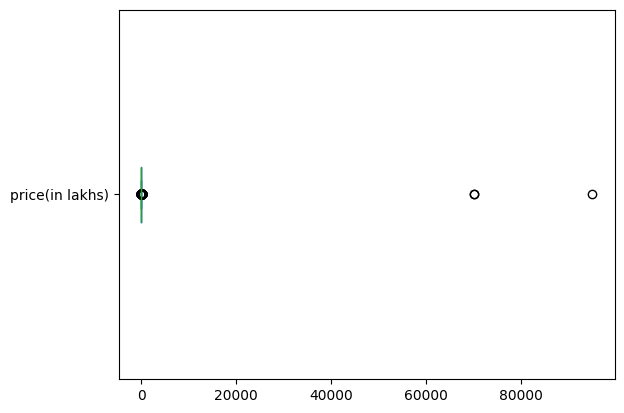

In [6]:
df['price(in lakhs)'].plot.box(vert = False)

In [7]:
q1 = df['price(in lakhs)'].quantile(0.25)
q3 = df['price(in lakhs)'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

df = df[(df['price(in lakhs)'] > lower) & (df['price(in lakhs)'] < upper)]

<Axes: >

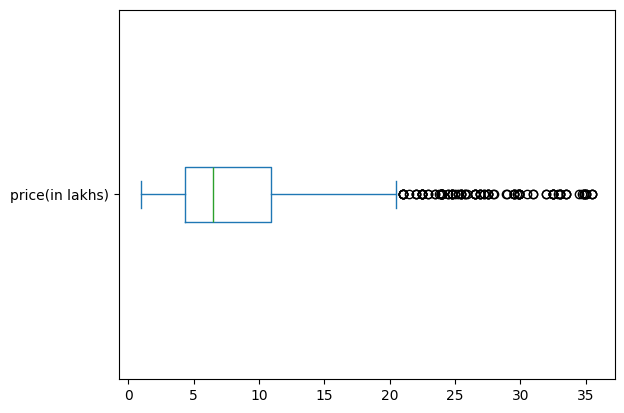

In [8]:
df['price(in lakhs)'].plot.box(vert = False)

In [9]:
from types import SimpleNamespace
y = df['price(in lakhs)']
X = df.drop('price(in lakhs)', axis=1)
X

,fuel_type,kms_driven,engine(cc)
1,Petrol,30615,999.0
2,Diesel,24000,1995.0
3,Petrol,18378,1353.0
4,Petrol,44900,1798.0
5,Petrol,42000,1199.0
...,...,...,...
1548,Diesel,35000,11345.0
1549,Petrol,10000,6706.0
1550,Petrol,49000,1199.0
1551,Petrol,40000,999.0


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

# Zadanie 2
Utwórz rurociąg, aby przetwarzać dane

In [44]:
nums = X.select_dtypes(include="number").columns
cats = X.select_dtypes(include="object").columns
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
])
cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output = False)),
])
preproc = ColumnTransformer(
    transformers = [
      ('num', num_pipeline, nums),
      ('cat', cat_pipeline, cats),
])
model = Pipeline([
    ('preproc', preproc),
    ('model', tree.DecisionTreeRegressor(max_depth=4,
                                         random_state=42))
])
model.set_output(transform="pandas")
model

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['kms_driven', 'engine(cc)'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['fuel_type'], dtype='object'))])),
                ('model', DecisionTreeRegressor(max_depth=4, random_state=42))])

# Zadanie 3
Utwórz ostateczny model i przeszkolić go

In [45]:
model.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['kms_driven', 'engine(cc)'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['fuel_type'], dtype='object'))])),
                ('model', DecisionTreeRegressor(max_depth=4, random_state=42))])

# Zadanie 4
Wydaj podstawowe wskaźniki modelu

Metryki pozostają niezmienione

In [46]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,2.70,3.04
RMSE,4.12,4.72
R2,0.67,0.57


# Zadanie 5
Zmień parametry modelu i spróbuj poprawić wynik

Zwiększona głębokość do 5

In [20]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,2.34,2.80
RMSE,3.69,4.51
R2,0.73,0.61


Maksymalna głębokość = 15, rozmiar pociągu = 0,88

In [38]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,0.36,1.62
RMSE,0.83,3.05
R2,0.99,0.82


# Zadanie 6
Zapisz model

In [47]:
import joblib
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']